<h1>WeatherPy</h1>

<big><b>Analysis</big></b><br>
<big><b>Observable Trend 1:  <br></big></b>
<big><b>Observable Trend 2:  <br></big></b>
<big><b>Observable Trend 3:  </big></b>

In [1]:
# Import Dependencies
import json
import requests
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt

from citipy import citipy
from config import api_key

<h1>Generate Cities List and Perform API Calls </h1>

In [2]:
# Cities list, which will include country code
cities_list = []

# Lists which will be used to build the dataframe
city = []
country = []
latitude = []
longitude = []
date = []
temp = []
humidity = []
cloudiness = []
windspeed = []

# OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Initialize count (need 500 cities with no duplicates that all play nice with OpenWeatherMap)
count = 0

# I'm curious to see how many get dropped where.
total_loops = 0
non_dupe_drop_loop = 0

# Big ole while loop that does everything.  Generate random coords, find cities, get data, skip anything that doesn't work.
while count < 1000:
    total_loops += 1
    
    # Final address for each loop's city
    address = []
    
    # Generation of random coords
    lat_loop = random.randint(-90, 90)
    long_loop = random.randint(-180, 180)
    
    # Find nearest city
    city_loop = citipy.nearest_city(lat_loop, long_loop)
    
    # Retrieving city name and country code from lat/long pair
    city_name = city_loop.city_name
    country_code = city_loop.country_code
    
    # Finalize address per loop
    address.append(city_name)
    address.append(country_code)
    
    # Check to make sure there are no dupe addresses
    if address not in cities_list:
        non_dupe_drop_loop += 1
        
        # Query url using current loop's city and specifying units as imperial
        query_url = f'{url}appid={api_key}&q={address[0]},{address[1]}&units=imperial'
        
        # Call, store response as JSON obj
        response = requests.get(query_url)
        json = response.json()
        
        # Many of the cities in citipy don't have any entries in openweathermap. I don't want empty values
        try:
            # Date retrieval, unix, UTC
            date_loop = json['dt']
            
            # For use in the charts later, convert into something readable
            date_loop = datetime.datetime.fromtimestamp(
            int(date_loop)
            ).strftime('%Y-%m-%d %H:%M:%S')

            # Temp retrieval, F
            temp_loop = json['main']['temp_max']

            # Humidity retrieval, %
            humidity_loop = json['main']['humidity']

            # Cloudiness retrieval, %
            cloud_loop = json['clouds']['all']

            # WindSpeed retrieval, mph
            wind_loop = json['wind']['speed']
            
            # Replace random coords with city's coords
            lat_loop = json['coord']['lat']
            long_loop = json['coord']['lon']

            # If the API call was successful in all attempts, add each value to its respective list
            city.append(city_name)
            country.append(country_code)
            latitude.append(lat_loop)
            longitude.append(long_loop)
            date.append(date_loop)
            temp.append(temp_loop)
            humidity.append(humidity_loop)
            cloudiness.append(cloud_loop)
            windspeed.append(wind_loop)
            cities_list.append(address)
                            
            # Hide my API key
            url_front = query_url[:53]
            url_back = query_url[85:]
            censor = ('*' * 32)
            printable_url = url_front + censor + url_back
            
            count += 1

            # Print
            print(f'Currently calling city number {count}:')
            print(f'{city_name}, {country_code}')
            print(printable_url)
            print('')

        except:
            continue



Currently calling city number 1:
cape town, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cape town,za&units=imperial

Currently calling city number 2:
xifeng, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=xifeng,cn&units=imperial

Currently calling city number 3:
torbay, ca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=torbay,ca&units=imperial

Currently calling city number 4:
manzil salim, tn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=manzil salim,tn&units=imperial

Currently calling city number 5:
port alfred, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=port alfred,za&units=imperial

Currently calling city number 6:
klaksvik, fo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=klaksvik,fo&units=imperial

Currently calling ci

Currently calling city number 53:
new norfolk, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=new norfolk,au&units=imperial

Currently calling city number 54:
fortuna, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=fortuna,us&units=imperial

Currently calling city number 55:
bredasdorp, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bredasdorp,za&units=imperial

Currently calling city number 56:
tiznit, ma
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tiznit,ma&units=imperial

Currently calling city number 57:
yining, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yining,cn&units=imperial

Currently calling city number 58:
kadiri, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kadiri,in&units=imperial

Currently calling city num

Currently calling city number 104:
ibipeba, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ibipeba,br&units=imperial

Currently calling city number 105:
jamestown, sh
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=jamestown,sh&units=imperial

Currently calling city number 106:
nome, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nome,us&units=imperial

Currently calling city number 107:
barrow, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=barrow,us&units=imperial

Currently calling city number 108:
kokkola, fi
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kokkola,fi&units=imperial

Currently calling city number 109:
swan hill, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=swan hill,au&units=imperial

Currently calling city numbe

Currently calling city number 155:
san cristobal, ec
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san cristobal,ec&units=imperial

Currently calling city number 156:
saldanha, za
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=saldanha,za&units=imperial

Currently calling city number 157:
hilo, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hilo,us&units=imperial

Currently calling city number 158:
cerrik, al
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cerrik,al&units=imperial

Currently calling city number 159:
lagunas, pe
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lagunas,pe&units=imperial

Currently calling city number 160:
san jose, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san jose,ph&units=imperial

Currently calling ci

Currently calling city number 205:
ust-maya, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ust-maya,ru&units=imperial

Currently calling city number 206:
agadir, ma
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=agadir,ma&units=imperial

Currently calling city number 207:
hithadhoo, mv
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hithadhoo,mv&units=imperial

Currently calling city number 208:
sabang, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sabang,id&units=imperial

Currently calling city number 209:
qaracala, az
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=qaracala,az&units=imperial

Currently calling city number 210:
geraldton, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=geraldton,au&units=imperial

Currently calling ci

Currently calling city number 256:
arlit, ne
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=arlit,ne&units=imperial

Currently calling city number 257:
vila velha, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=vila velha,br&units=imperial

Currently calling city number 258:
cuamba, mz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cuamba,mz&units=imperial

Currently calling city number 259:
colquechaca, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=colquechaca,bo&units=imperial

Currently calling city number 260:
sistranda, no
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sistranda,no&units=imperial

Currently calling city number 261:
kamina, cd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kamina,cd&units=imperial

Currently calling 

Currently calling city number 307:
cravo norte, co
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cravo norte,co&units=imperial

Currently calling city number 308:
kreminna, ua
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kreminna,ua&units=imperial

Currently calling city number 309:
rockhampton, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=rockhampton,au&units=imperial

Currently calling city number 310:
nuuk, gl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nuuk,gl&units=imperial

Currently calling city number 311:
darhan, mn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=darhan,mn&units=imperial

Currently calling city number 312:
vila franca do campo, pt
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=vila franca do campo,pt&units=im

Currently calling city number 357:
linqing, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=linqing,cn&units=imperial

Currently calling city number 358:
boo, se
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=boo,se&units=imperial

Currently calling city number 359:
caravelas, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=caravelas,br&units=imperial

Currently calling city number 360:
sinnamary, gf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sinnamary,gf&units=imperial

Currently calling city number 361:
bhasawar, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bhasawar,in&units=imperial

Currently calling city number 362:
shache, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=shache,cn&units=imperial

Currently calling city numbe

Currently calling city number 408:
huilong, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=huilong,cn&units=imperial

Currently calling city number 409:
morlaix, fr
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=morlaix,fr&units=imperial

Currently calling city number 410:
baruun-urt, mn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=baruun-urt,mn&units=imperial

Currently calling city number 411:
cayenne, gf
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=cayenne,gf&units=imperial

Currently calling city number 412:
mahenge, tz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mahenge,tz&units=imperial

Currently calling city number 413:
namatanai, pg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=namatanai,pg&units=imperial

Currently calling 

Currently calling city number 458:
mount isa, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mount isa,au&units=imperial

Currently calling city number 459:
yulara, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=yulara,au&units=imperial

Currently calling city number 460:
denpasar, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=denpasar,id&units=imperial

Currently calling city number 461:
tarko-sale, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tarko-sale,ru&units=imperial

Currently calling city number 462:
arivonimamo, mg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=arivonimamo,mg&units=imperial

Currently calling city number 463:
barra patuca, hn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=barra patuca,hn&units=imperial



Currently calling city number 509:
olga, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=olga,ru&units=imperial

Currently calling city number 510:
awjilah, ly
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=awjilah,ly&units=imperial

Currently calling city number 511:
druzhba, ua
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=druzhba,ua&units=imperial

Currently calling city number 512:
mudbidri, in
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mudbidri,in&units=imperial

Currently calling city number 513:
waingapu, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=waingapu,id&units=imperial

Currently calling city number 514:
itarema, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=itarema,br&units=imperial

Currently calling city number 

Currently calling city number 560:
chaiyaphum, th
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=chaiyaphum,th&units=imperial

Currently calling city number 561:
lumut, my
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lumut,my&units=imperial

Currently calling city number 562:
maralal, ke
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=maralal,ke&units=imperial

Currently calling city number 563:
palauig, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=palauig,ph&units=imperial

Currently calling city number 564:
tsumeb, na
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=tsumeb,na&units=imperial

Currently calling city number 565:
bad doberan, de
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bad doberan,de&units=imperial

Currently calling ci

Currently calling city number 611:
ende, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ende,id&units=imperial

Currently calling city number 612:
norsup, vu
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=norsup,vu&units=imperial

Currently calling city number 613:
moyale, ke
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=moyale,ke&units=imperial

Currently calling city number 614:
barroquinha, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=barroquinha,br&units=imperial

Currently calling city number 615:
pingliang, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=pingliang,cn&units=imperial

Currently calling city number 616:
kopavogur, is
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kopavogur,is&units=imperial

Currently calling city

Currently calling city number 662:
waitati, nz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=waitati,nz&units=imperial

Currently calling city number 663:
male, mv
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=male,mv&units=imperial

Currently calling city number 664:
hit, iq
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=hit,iq&units=imperial

Currently calling city number 665:
salalah, om
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=salalah,om&units=imperial

Currently calling city number 666:
sabancuy, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sabancuy,mx&units=imperial

Currently calling city number 667:
shieli, kz
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=shieli,kz&units=imperial

Currently calling city number 668:
sretens

Currently calling city number 713:
ketchikan, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ketchikan,us&units=imperial

Currently calling city number 714:
maraa, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=maraa,br&units=imperial

Currently calling city number 715:
mapimi, mx
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mapimi,mx&units=imperial

Currently calling city number 716:
sungairaya, id
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=sungairaya,id&units=imperial

Currently calling city number 717:
bahia blanca, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bahia blanca,ar&units=imperial

Currently calling city number 718:
isiro, cd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=isiro,cd&units=imperial

Currently calling 

Currently calling city number 764:
kande, tg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kande,tg&units=imperial

Currently calling city number 765:
alihe, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=alihe,cn&units=imperial

Currently calling city number 766:
huancayo, pe
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=huancayo,pe&units=imperial

Currently calling city number 767:
kainantu, pg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kainantu,pg&units=imperial

Currently calling city number 768:
san matias, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=san matias,bo&units=imperial

Currently calling city number 769:
savalou, bj
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=savalou,bj&units=imperial

Currently calling city num

Currently calling city number 814:
riberalta, bo
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=riberalta,bo&units=imperial

Currently calling city number 815:
shenjiamen, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=shenjiamen,cn&units=imperial

Currently calling city number 816:
kirakira, sb
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=kirakira,sb&units=imperial

Currently calling city number 817:
amursk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=amursk,ru&units=imperial

Currently calling city number 818:
lady lake, us
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lady lake,us&units=imperial

Currently calling city number 819:
domoni, km
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=domoni,km&units=imperial

Currently callin

Currently calling city number 864:
salgar, co
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=salgar,co&units=imperial

Currently calling city number 865:
valparaiso, cl
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=valparaiso,cl&units=imperial

Currently calling city number 866:
mafeteng, ls
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=mafeteng,ls&units=imperial

Currently calling city number 867:
zubtsov, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=zubtsov,ru&units=imperial

Currently calling city number 868:
maceio, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=maceio,br&units=imperial

Currently calling city number 869:
maues, br
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=maues,br&units=imperial

Currently calling city numbe

Currently calling city number 914:
nizhnyaya tavda, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=nizhnyaya tavda,ru&units=imperial

Currently calling city number 915:
munai, ph
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=munai,ph&units=imperial

Currently calling city number 916:
diplo, pk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=diplo,pk&units=imperial

Currently calling city number 917:
veseloyarsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=veseloyarsk,ru&units=imperial

Currently calling city number 918:
severodvinsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=severodvinsk,ru&units=imperial

Currently calling city number 919:
grindavik, is
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=grindavik,is&units=imperial

Currently calling city number 965:
ulladulla, au
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=ulladulla,au&units=imperial

Currently calling city number 966:
belyy yar, ru
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=belyy yar,ru&units=imperial

Currently calling city number 967:
falam, mm
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=falam,mm&units=imperial

Currently calling city number 968:
lingao, cn
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=lingao,cn&units=imperial

Currently calling city number 969:
comodoro rivadavia, ar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=comodoro rivadavia,ar&units=imperial

Currently calling city number 970:
bumba, cd
http://api.openweathermap.org/data/2.5/weather?appid=********************************&q=bumba,cd&units=imperial

Currentl

In [24]:
# Just to see how many times the loop was abandoned due to my if statement or try/except statement
final_non_dupe_drop_loop = non_dupe_drop_loop - 1000
print(f'Number of random coords generated: {total_loops}')
print(f'Number of generated coords that don\'t have entries in OWM: {final_non_dupe_drop_loop}')


Number of random coords generated: 3686
Number of generated coords that don't have entries in OWM: 479


In [4]:
# Build data frame with collected data
df = pd.DataFrame({'City' : city,
                   'Cloudiness' : cloudiness,
                   'Country' : country,
                   'Date' : date,
                   'Humidity' : humidity,
                   'Lat' : latitude,
                   'Lng' : longitude,
                   'Max Temp' : temp,
                   'Wind Speed' : windspeed
                   })

print(len(df['City']))
df.head()

1000


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,20,za,2018-04-02 16:00:00,72,-33.93,18.42,68.00,16.11
1,xifeng,92,cn,2018-04-02 17:01:16,94,42.73,124.72,38.56,4.59
2,torbay,20,ca,2018-04-02 16:00:00,51,47.66,-52.73,39.20,17.22
3,manzil salim,0,tn,2018-04-02 16:00:00,37,35.86,8.48,62.60,9.17
4,port alfred,64,za,2018-04-02 17:01:09,89,-33.59,26.89,71.23,10.40


<h1>Latitude vs Temperature Plot</h1>

Text(0.5,1,'City Latitude vs. Max Temperature on 2018-04-02')

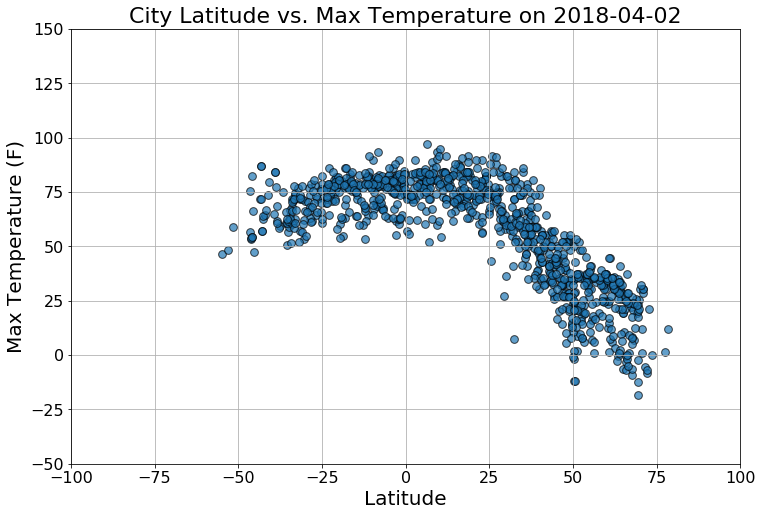

In [5]:
current_date =  df['Date'][0][:10]

df.plot.scatter('Lat', 'Max Temp', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True, 
                xlim=(-100, 100), ylim=(-50, 150))

plt.ylabel('Max Temperature (F)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Max Temperature on {current_date}', fontsize=22)


<h1>Latitude vs Humidity Plot</h1>

Text(0.5,1,'City Latitude vs. Humidity on 2018-04-02')

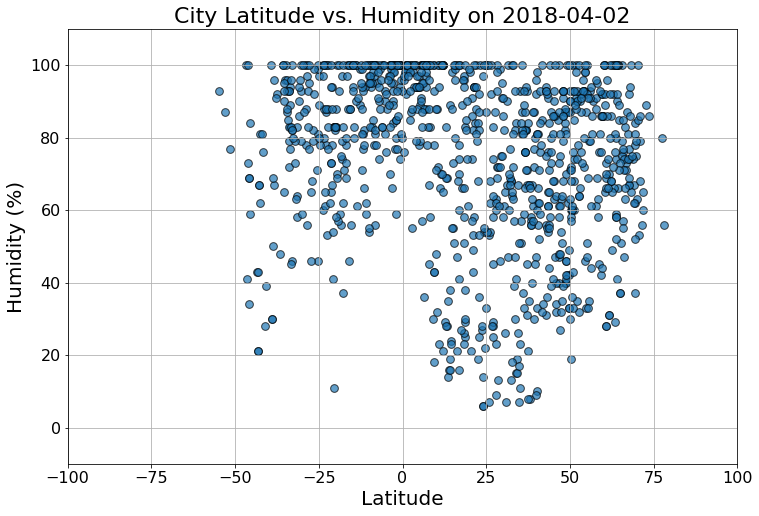

In [6]:
df.plot.scatter('Lat', 'Humidity', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True,
                xlim=(-100, 100), ylim=(-10, 110))

plt.ylabel('Humidity (%)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Humidity on {current_date}', fontsize=22)


<h1>Latitude vs Cloudiness Plot</h1>

Text(0.5,1,'City Latitude vs. Cloud Coverage on 2018-04-02')

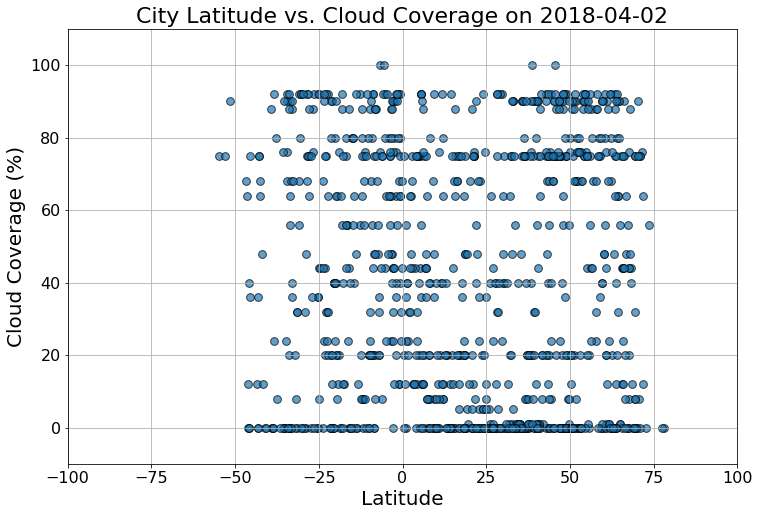

In [17]:
df.plot.scatter('Lat', 'Cloudiness', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True,
                xlim=(-100, 100), ylim=(-10, 110))

plt.ylabel('Cloud Coverage (%)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Cloud Coverage on {current_date}', fontsize=22)


<h1>Latitude vs Wind Speed Plot</h1>

Text(0.5,1,'City Latitude vs. Wind Speed on 2018-04-02')

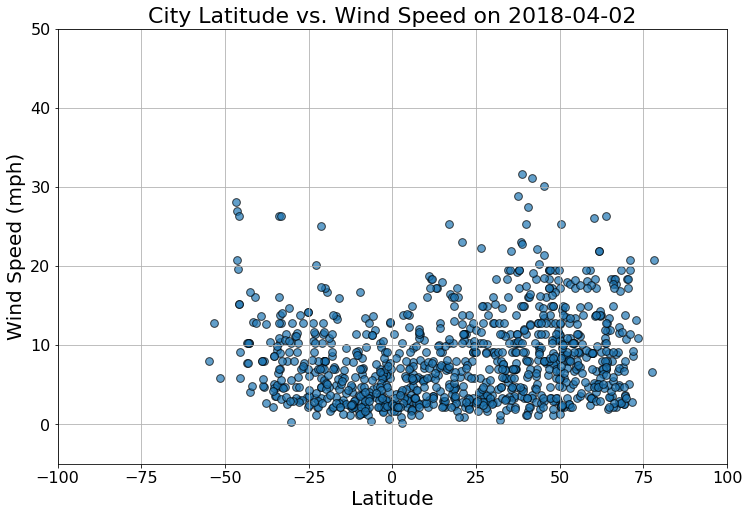

In [16]:
df.plot.scatter('Lat', 'Wind Speed', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True,
                xlim=(-100, 100), ylim=(-5, 50))

plt.ylabel('Wind Speed (mph)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Wind Speed on {current_date}', fontsize=22)



Text(0.5,1,'Map')

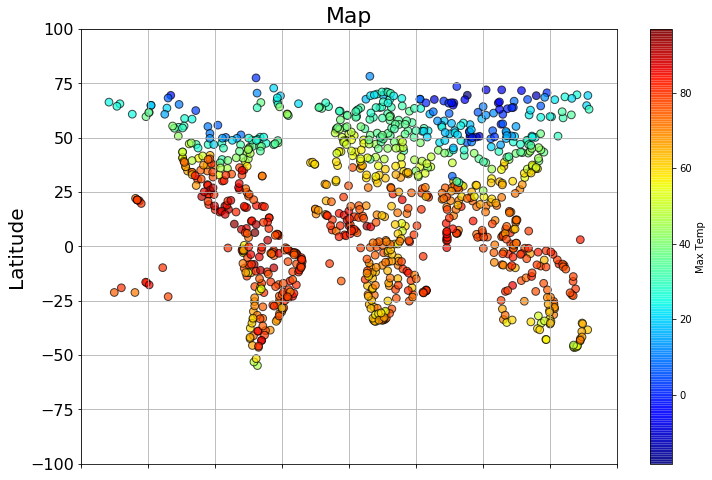

In [19]:
current_date =  df['Date'][0][:10]

df.plot.scatter('Lng', 'Lat', s=60, edgecolor='black', alpha=0.70, c='Max Temp', colormap = 'jet',
                figsize=(12, 8), fontsize=16, grid=True, 
                xlim=(-200, 200), ylim=(-100, 100))

plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.title('Map', fontsize=22)

Text(0.5,1,'Map')

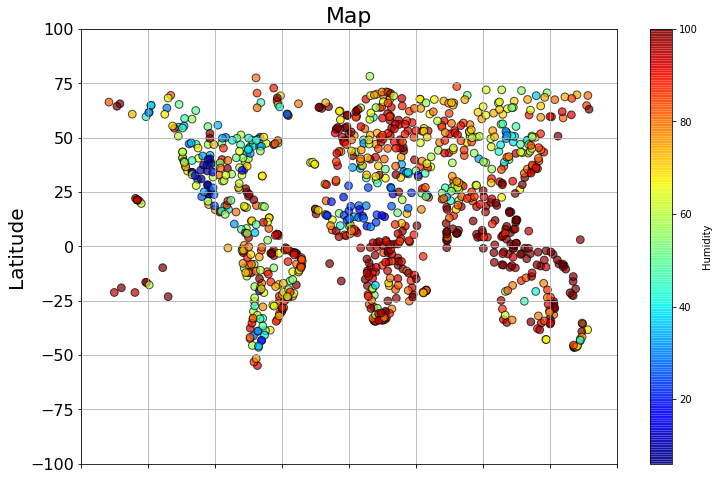

In [20]:
current_date =  df['Date'][0][:10]

df.plot.scatter('Lng', 'Lat', s=60, edgecolor='black', alpha=0.70, c='Humidity', colormap = 'jet',
                figsize=(12, 8), fontsize=16, grid=True, 
                xlim=(-200, 200), ylim=(-100, 100))

plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.title('Map', fontsize=22)

In [10]:
#SAVE A CSV, PNGS AND A MARKDOWN